In [6]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [7]:
db=datasets.load_diabetes()
scaler = StandardScaler()
#to make dataset bounded within a given range
X, y = db.data, db.target
# X contains the 10 features that describe various attributes related to the patients' health and diabetes measurements. It's the input for the model.
# y is the scores range from approximately 25 to 346, with higher scores indicating a greater progression of the disease.
X_scaled = scaler.fit_transform(X)
#X is now normalized
y_binned = np.digitize(y, bins=[y.mean() - y.std(), y.mean() + y.std()])

<h4>Not Required. Just tried to find best random_state to get best accuracy </h4>

In [9]:
# accus = []
# for n in range(100):
#     X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_binned,train_size =0.8,random_state=n)
#     classifier=neighbors.KNeighborsClassifier(n_neighbors=5)
#     classifier.fit(X_train,y_train)
#     y_pred=classifier.predict(X_test)
#     accuracy=accuracy_score(y_test,y_pred)
#     # print(f'Accuracy: {accuracy * 100:.2f}%')
#     accus.append(accuracy*100)
# max_index = np.argmax(accus)
# max_index

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_binned,train_size =0.8,random_state=21)
classifier=neighbors.KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy*100

74.15730337078652

<h4><u>Unseen Data</u></h4>

In [12]:
input_data = np.array([[15, 130, 70, 20, 80, 30.5, 0.4, 45,0,0]])

prediction = classifier.predict(input_data)
if prediction[0] == 1:
    print("Diabetic")
else:
    print("Not Diabetic")
# print("Prediction:", "Diabetic" if prediction[0] == 1 else "Non-Diabetic")

Diabetic


<h4><i><u>Scatter Plot Scatter Plot of Actual vs. Predicted Outcomes</u></i></h4>

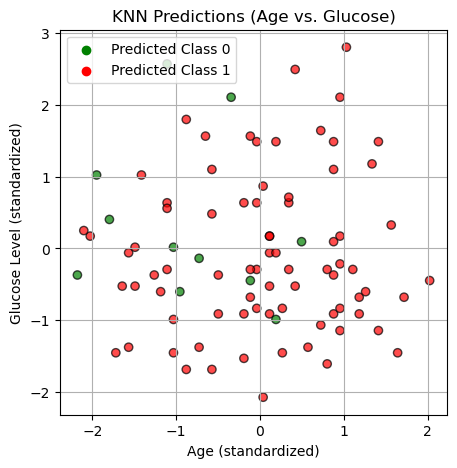

In [16]:
plt.figure(figsize=(5,5))
colors = np.where(y_pred == 0, 'green', 'red')
plt.scatter(X_test[:, 0], X_test[:, 6], color=colors, alpha=0.7,edgecolors='k')
plt.title('KNN Predictions (Age vs. Glucose)')
plt.xlabel('Age (standardized)')
plt.ylabel('Glucose Level (standardized)')
plt.grid()
plt.scatter([], [], color='green', label='Predicted Class 0')
plt.scatter([], [], color='red', label='Predicted Class 1')
plt.legend()
plt.show()